In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#reading data created in dryf_data_jup


cha13=open('chanelA13','rb')
chanelA13=pickle.load(cha13)
cha13.close()
cha23=open('chanelA23','rb')
chanelA23=pickle.load(cha23)
cha23.close()
chb13=open('chanelB13','rb')
chanelB13=pickle.load(chb13)
chb13.close()
chb23=open('chanelB23','rb')
chanelB23=pickle.load(chb23)
chb23.close()
t13=open('time13','rb')
time13=pickle.load(t13)
t13.close()
t23=open('time23','rb')
time23=pickle.load(t23)
t23.close()

mdA13=open('midA13','rb')
midA13=pickle.load(mdA13)
mdA13.close()
mdA23=open('midA23','rb')
midA23=pickle.load(mdA23)
mdA23.close()
mdB13=open('midB13','rb')
midB13=pickle.load(mdB13)
mdB13.close()
mdb23=open('midB23','rb')
midB23=pickle.load(mdb23)
mdb23.close()


pA13=open('pozA13','rb')
pozA13=pickle.load(pA13)
pA13.close()
pB13=open('pozB13','rb')
pozB13=pickle.load(pB13)
pB13.close()
pA23=open('pozA23','rb')
pozA23=pickle.load(pA23)
pA23.close()
pB23=open('pozB23','rb')
pozB23=pickle.load(pB23)
pB23.close()



In [3]:
#picking data around the mid point
#timeSA are arrays of time measurements and SA/SB are arrays of voltage measurements
#three mid points are considered to minimize error
timeSA13=[[]for _ in range(25)]
timeSA23=[[]for _ in range(25)]
timeSB13=[[]for _ in range(25)]
timeSB23=[[]for _ in range(25)]
timeSA131=[[]for _ in range(25)]
timeSA231=[[]for _ in range(25)]
timeSB131=[[]for _ in range(25)]
timeSB231=[[]for _ in range(25)]
timeSA132=[[]for _ in range(25)]
timeSA232=[[]for _ in range(25)]
timeSB132=[[]for _ in range(25)]
timeSB232=[[]for _ in range(25)]


SA13=[[]for _ in range(25)]
SA23=[[]for _ in range(25)]
SB13=[[]for _ in range(25)]
SB23=[[]for _ in range(25)]

SA131=[[]for _ in range(25)]
SA231=[[]for _ in range(25)]
SB131=[[]for _ in range(25)]
SB231=[[]for _ in range(25)]

SA132=[[]for _ in range(25)]
SA232=[[]for _ in range(25)]
SB132=[[]for _ in range(25)]
SB232=[[]for _ in range(25)]

for i in range(25):
    for j in range(20):

        timeSA13[i].append(time13[i][j][0][(pozA13[i][j][0][0]-4):(pozA13[i][j][0][0]+4)])
        timeSA23[i].append(time23[i][j][0][(pozA23[i][j][0][0]-4):(pozA23[i][j][0][0]+4)])
        timeSB13[i].append(time13[i][j][0][(pozB13[i][j][0][0]-4):(pozB13[i][j][0][0]+4)])
        timeSB23[i].append(time23[i][j][0][(pozB23[i][j][0][0]-4):(pozB23[i][j][0][0]+4)])
  
        timeSA131[i].append(time13[i][j][0][(pozA13[i][j][1][0]-4):(pozA13[i][j][1][0]+4)])
        timeSA231[i].append(time23[i][j][0][(pozA23[i][j][1][0]-4):(pozA23[i][j][1][0]+4)])
        timeSB131[i].append(time13[i][j][0][(pozB13[i][j][1][0]-4):(pozB13[i][j][1][0]+4)])
        timeSB231[i].append(time23[i][j][0][(pozB23[i][j][1][0]-4):(pozB23[i][j][1][0]+4)])
        
        timeSA132[i].append(time13[i][j][0][(pozA13[i][j][2][0]-4):(pozA13[i][j][2][0]+4)])
        timeSA232[i].append(time23[i][j][0][(pozA23[i][j][2][0]-4):(pozA23[i][j][2][0]+4)])
        timeSB132[i].append(time13[i][j][0][(pozB13[i][j][2][0]-4):(pozB13[i][j][2][0]+4)])
        timeSB232[i].append(time23[i][j][0][(pozB23[i][j][2][0]-4):(pozB23[i][j][2][0]+4)])

        SA13[i].append(chanelA13[i][j][0][(pozA13[i][j][0][0]-4):(pozA13[i][j][0][0]+4)])
        SA23[i].append(chanelA23[i][j][0][(pozA23[i][j][0][0]-4):(pozA23[i][j][0][0]+4)])
        SB13[i].append(chanelB13[i][j][0][(pozB13[i][j][0][0]-4):(pozB13[i][j][0][0]+4)])
        SB23[i].append(chanelB23[i][j][0][(pozB23[i][j][0][0]-4):(pozB23[i][j][0][0]+4)])
       
        SA131[i].append(chanelA13[i][j][0][(pozA13[i][j][1][0]-4):(pozA13[i][j][1][0]+4)])
        SA231[i].append(chanelA23[i][j][0][(pozA23[i][j][1][0]-4):(pozA23[i][j][1][0]+4)])
        SB131[i].append(chanelB13[i][j][0][(pozB13[i][j][1][0]-4):(pozB13[i][j][1][0]+4)])
        SB231[i].append(chanelB23[i][j][0][(pozB23[i][j][1][0]-4):(pozB23[i][j][1][0]+4)])
        
        SA132[i].append(chanelA13[i][j][0][(pozA13[i][j][2][0]-4):(pozA13[i][j][2][0]+4)])
        SA232[i].append(chanelA23[i][j][0][(pozA23[i][j][2][0]-4):(pozA23[i][j][2][0]+4)])
        SB132[i].append(chanelB13[i][j][0][(pozB13[i][j][2][0]-4):(pozB13[i][j][2][0]+4)])
        SB232[i].append(chanelB23[i][j][0][(pozB23[i][j][2][0]-4):(pozB23[i][j][2][0]+4)])

        #straight lines will be fitted to S
def f(x,a,b):
    return a*x+b


In [4]:
#arrays of curve_fit parameters for 3 mid points
parsA13=[[]for _ in range(25)]
parsB13=[[]for _ in range(25)]
parsA23=[[]for _ in range(25)]
parsB23=[[]for _ in range(25)]

covA13=[[]for _ in range(25)]
covB13=[[]for _ in range(25)]
covA23=[[]for _ in range(25)]
covB23=[[]for _ in range(25)]

parsA131=[[]for _ in range(25)]
parsB131=[[]for _ in range(25)]
parsA231=[[]for _ in range(25)]
parsB231=[[]for _ in range(25)]
a=[[]for _ in range(25)]
parsA132=[[]for _ in range(25)]
parsB132=[[]for _ in range(25)]
parsA232=[[]for _ in range(25)]
parsB232=[[]for _ in range(25)]
for i in range(25):
    for j in range(20):
        parsA13[i].append(curve_fit(f,timeSA13[i][j],SA13[i][j])[0])
    
        parsB13[i].append(curve_fit(f,timeSB13[i][j],SB13[i][j])[0])
        parsA23[i].append(curve_fit(f,timeSA23[i][j],SA23[i][j])[0])
        parsB23[i].append(curve_fit(f,timeSB23[i][j],SB23[i][j])[0])
        
        covA13[i].append(curve_fit(f,timeSA13[i][j],SA13[i][j])[1])
        covB13[i].append(curve_fit(f,timeSB13[i][j],SB13[i][j])[1])
        covA23[i].append(curve_fit(f,timeSA23[i][j],SA23[i][j])[1])
        covB23[i].append(curve_fit(f,timeSB23[i][j],SB23[i][j])[1])

        parsA131[i].append(curve_fit(f,timeSA131[i][j],SA131[i][j])[0])
        parsA132[i].append(curve_fit(f,timeSA132[i][j],SA132[i][j])[0])
        parsB131[i].append(curve_fit(f,timeSB131[i][j],SB131[i][j])[0])
        parsB132[i].append(curve_fit(f,timeSB132[i][j],SB132[i][j])[0])
        parsA231[i].append(curve_fit(f,timeSA231[i][j],SA231[i][j])[0])
        parsA232[i].append(curve_fit(f,timeSA232[i][j],SA232[i][j])[0])
        parsB231[i].append(curve_fit(f,timeSB231[i][j],SB231[i][j])[0])
        parsB232[i].append(curve_fit(f,timeSB232[i][j],SB232[i][j])[0])



In [5]:
k=0
u=0
j=0
h=0
#coef are arrays of curve_fit parameters after eliminating most popular error -- negative 'a' parameter.
coefA13=[[]for _ in range(25)]
coefA23=[[]for _ in range(25)]
coefB13=[[]for _ in range(25)]
coefB23=[[]for _ in range(25)]
covA13=[[]for _ in range(25)]
covA23=[[]for _ in range(25)]
covB13=[[]for _ in range(25)]
covB23=[[]for _ in range(25)]
for i in range(25):
    for j in range(20):      
        if parsA13[i][j][0]<0:
            if parsA131[i][j][0]<0:
                coefA13[i].append(parsA132[i][j])
                if parsA131[i][j][0]<0: k+=1
            elif parsA131[i][j][0]>0:
                coefA13[i].append(parsA131[i][j])
        elif parsA13[i][j][0]>0:
            coefA13[i].append(parsA13[i][j])
for i in range(25):
    for j in range(20): 
        if parsB13[i][j][0]<0:
            if parsB131[i][j][0]<0:
                coefB13[i].append(parsB132[i][j])
                if parsB132[i][j][0]<0:
                    u+=1
            elif parsB131[i][j][0]>0:
                coefB13[i].append(parsB131[i][j])
        elif parsB13[i][j][0]>0:
            coefB13[i].append(parsB13[i][j])   
for i in range(25):
    for j in range(20): 
        if parsA23[i][j][0]<0:
            if parsA231[i][j][0]<0:
                coefA23[i].append(parsA232[i][j])
                if parsA232[i][j][0]<0:
                    j+=1
            elif parsA231[i][j][0]>0:
                coefA23[i].append(parsA231[i][j])
        elif parsA23[i][j][0]>0:
            coefA23[i].append(parsA23[i][j])
for i in range(25):
    for j in range(20): 
        if parsB23[i][j][0]<0:
            if parsB231[i][j][0]<0:
                coefB23[i].append(parsB232[i][j])
                if parsB232[i][j][0]<0:h+=1
            elif parsB231[i][j][0]>0:
                coefB23[i].append(parsB231[i][j])
        elif parsB23[i][j][0]>0:
            coefB23[i].append(parsB23[i][j])

print('wrong fits=',k+u+h+j) 
print('all fits=',len(coefA13)*len(coefA13[0])*4)
#unfortunately we still end up with some wrong fits but its less than 1% of all fits


wrong fits= 19
all fits= 2000


In [6]:
#creating array of tested voltages (for plotting)
rang=[]
for i in range(25):
    rang.append((i+6)*100)


In [7]:




#points of crossing
crossA13=[[]for _ in range(25)]
crossB13=[[]for _ in range(25)]
crossA23=[[]for _ in range(25)]
crossB23=[[]for _ in range(25)]
#time arrays
meantime13=[0 for _ in range(25)]
meantime23=[0 for _ in range(25)]
meantime12=[0 for _ in range(25)]

abctime13=[[]for _ in range(25)] #temporary ones
abctime23=[[]for _ in range(25)]
abctime12=[[]for _ in range(25)]
#final velocity arrays
velmean23=[]
velmean13=[]
velmean12=[]


dat=[]

for i in range(25):
    for j in range(20):
        crossA13[i].append((midA13[i][j]-coefA13[i][j][1])/coefA13[i][j][0])
        crossB13[i].append((midB13[i][j]-coefB13[i][j][1])/coefB13[i][j][0])
        crossA23[i].append((midA23[i][j]-coefA23[i][j][1])/coefA23[i][j][0])
        crossB23[i].append((midB23[i][j]-coefB23[i][j][1])/coefB23[i][j][0])
for i in range(25):
    for j in range(20):
        abctime13[i].append((crossB13[i][j]-crossA13[i][j]))
        abctime23[i].append((crossB23[i][j]-crossA23[i][j]))
        abctime12[i].append((crossB13[i][j]-crossA13[i][j])-(crossB23[i][j]-crossA23[i][j]))

#eliminating wrong elements
abctime12[1][3]=abctime12[1][1]
abctime12[1][8]=abctime12[1][6]
abctime12[2][5]=abctime12[2][2]




#meaning the means :D
for i in range(25):
    for j in range(20):
        meantime13[i]+=(abctime13[i][j])/20
        meantime23[i]+=(abctime23[i][j])/20
        meantime12[i]+=(abctime12[i][j])/20
#and obtaining velocity results
for i in range(25):
    velmean13.append(9.42/meantime13[i])
    velmean23.append(4.82/meantime23[i])
    velmean12.append(4.6/meantime12[i])

#standard deviation of the mean for time
sigma121=[0 for _ in range(25)] #temporary
sigma12=[] #actual deviation


for i in range(25):
    for j in range(20):
        sigma121[i]+=(abctime12[i][j]-meantime12[i])**2
for i in range(25):
        sigma12.append(np.sqrt(sigma121[i])/(np.sqrt(19)*np.sqrt(20)))





#propagating uncertainties

sigmavel12=[] #velocity deviation

for i in range(25):
    sigmavel12.append( (4.6/(meantime12[i]**2)) *sigma12[i])
    
#fitting presumed curve to final results
def g(x,a,b):
    return  ( b*x + a*x**2)


parss12,cf=curve_fit(g,rang,velmean12,sigma=sigmavel12)
#data for plotting
for i in range(25):
    dat.append( (parss12[1]*int(rang[i])) +(parss12[0])*(rang[i])**2)
#chi square test
chi1=0

for i in range(25):
    chi1+=((velmean12[i]-dat[i])**2)/(23*sigmavel12[i]**2)



"""
with open('wyniki.txt','w') as v:
    for i in range(25):
        a='{j} {k} {l} {m}\n'.format(j=velmean12[i], k=sigmavel12[i], l=meantime12[i], m=sigma12[i])
        v.write(a)
        
with open('czas17.txt','w') as v:
    for i in range(20):
        a='{j}\n'.format(j=abctime12[17][i])
        v.write(a)
"""



"\nwith open('wyniki.txt','w') as v:\n    for i in range(25):\n        a='{j} {k} {l} {m}\n'.format(j=velmean12[i], k=sigmavel12[i], l=meantime12[i], m=sigma12[i])\n        v.write(a)\n        \nwith open('czas17.txt','w') as v:\n    for i in range(20):\n        a='{j}\n'.format(j=abctime12[17][i])\n        v.write(a)\n"

[A,B]= [2.77645254e-08 4.74884735e-04]
uncertainties(a,b)= 9.987922132474066e-10 1.53549485121129e-06
chi square test yields result for degree of freedom: 4.25360182280708 which means the proposed curve fits correctly


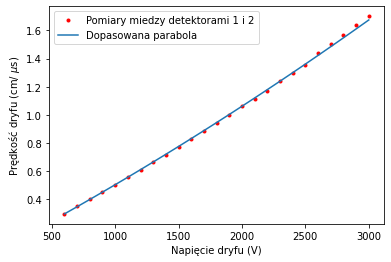

In [10]:

plt.plot(rang,velmean12,'.',label='Pomiary miedzy detektorami 1 i 2',color='red')

#errors are too small to be seen 
#plt.errorbar(rang,velmean12,yerr=sigmavel12,fmt='|',color='black',label='Błąd pomiaru prędkości')

plt.xlabel('Napięcie dryfu (V)')
plt.ylabel('Prędkość dryfu (cm/ $\mu$s)')
plt.plot(rang,dat,label='Dopasowana parabola')
plt.legend()


print('[A,B]=',parss12)
print('uncertainties(a,b)=',np.sqrt(cf[0][0]),np.sqrt(cf[1][1]))
print('chi square test yields result for degree of freedom:',chi1)
plt.savefig('wyniki12b.jpg')

#this used to create infographics

#plt.plot(time13[4][5][0],chanelA13[4][5][0]/2)
#plt.plot(time13[4][5][0],chanelB13[4][5][0]/500)
##plt.plot(range(18,20),(coefB13[4][5][0]*range(18,20)+coefB13[4][5][1])/500)
#plt.plot(range(-1,2),(coefA13[4][5][0]*range(-1,2)+coefA13[4][5][1]))
#plt.xlim(-2,25)
#plt.ylim(-0.1,0.3)
plt.show()
